# 1.0 Purpose
The purpose of this notebook is to use Embedding for a Natural Language Processing (NLP) task with TensorFlow on the imbd_reviews dataset.  Predictions are "1" for a bad review and "0" for  a good review.

# 2.0 Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


## Helper Functions

### decode_review

In [2]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



### get_training_metrics

In [3]:
def get_training_metrics(history):
  
  # This is needed depending on if you used the pretrained model or you trained it yourself
  if not isinstance(history, pd.core.frame.DataFrame):
    history = history.history
  
  acc = history['binary_accuracy']
  val_acc = history['val_binary_accuracy']

  loss = history['loss']
  val_loss = history['val_loss']

  return acc, val_acc, loss, val_loss

### plot_train_eval

In [4]:
def plot_train_eval(history,name='',parameters='',optimizer_name='',loss='',accuracy_metric='',epochs='',vocab_size='',embedding_dim='',max_length='',trunc_type='',oov_tok=''):
  acc, val_acc, loss_values, val_loss = get_training_metrics(history)

  acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
  acc_plot = sns.lineplot(data=acc_plot)
  acc_plot.set_title(f'training vs evaluation accuracy: {name} \n # parameters={parameters} \n optimizer_name={optimizer_name} \n loss={loss} \n accuracy_metric={accuracy_metric} \n epochs={epochs} \n vocab_size={vocab_size} \n embedding_dim={embedding_dim} \n max_length={max_length} \n trunc_type={trunc_type} \n oov_tok={oov_tok}')
  acc_plot.set_xlabel('epoch')
  acc_plot.set_ylabel(accuracy_metric)
  plt.savefig(f'{name} - train_acc_vs_eval_acc.jpg',bbox_inches='tight')
  plt.show()


  print("")

  loss_plot = pd.DataFrame({"training loss":loss_values, "evaluation loss":val_loss})
  loss_plot = sns.lineplot(data=loss_plot)
  loss_plot.set_title(f'training vs evaluation loss: {name} \n # parameters={parameters} \n optimizer_name={optimizer_name}  \n loss={loss} \naccuracy_metric={accuracy_metric} \n epochs={epochs} \n vocab_size={vocab_size} \n embedding_dim={embedding_dim} \n max_length={max_length} \n trunc_type={trunc_type} \n oov_tok={oov_tok}')
  loss_plot.set_xlabel('epoch')
  loss_plot.set_ylabel(loss)
  plt.savefig(f'{name} - train_loss_vs_eval_loss.jpg',bbox_inches='tight')
  plt.show()

### model_picker

In [88]:
def model_picker(vocab_size=100,embedding_dim=16,input_length=100,model_name='model1'):

  if model_name=='model1' or model_name=='model8' or model_name=='model9':
    model = tf.keras.Sequential([
                                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}, \n input_length={max_length}), \n Flatten, \n Dense(6,relu), \n Dense(1,sigmoid)'
  elif model_name=='model2':
    model = tf.keras.Sequential([
                                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                tf.keras.layers.GlobalAveragePooling1D(),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n GlobalAveragePooling1D,\n Dense(6,relu), \n Dense(1,sigmoid)'
  elif model_name=='model3':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}), \n Bidirectional(LSTM(64,return_sequences=True)), \n Bidirectional(LSTM(32)), \n Dense(64,relu), \n Dense(1,sigmoid)'
  elif model_name=='model4':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}), \n Bidirectional(LSTM(32)), \n Dense(24,relu), \n Dense(1,sigmoid)'
  elif model_name=='model14':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size}, \n embedding_dim={embedding_dim}), \n Bidirectional(LSTM(32)), \n Dropout(0.2), \n Dense(24,relu), \n Dense(1,sigmoid)'
  elif model_name=='model5':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n Bidirectional(LSTM(32)),Dense(6,relu),Dense(1,sigmoid)'
  elif model_name=='model6':
    model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n Conv1D(128,5,activation=relu), \n GlobalAveragePooling1D, \n Dense(6,relu),Dense(1,sigmoid)'
  elif model_name=='model7' or model_name=='model10' or model_name=='model11' or model_name=='model12' or model_name=='model13':
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model_description=f'Embedding(vocab_size={vocab_size},embedding_dim={embedding_dim},input_length={max_length}), \n Bidirectional(GRU(32)),Dense(6,relu),Dense(1,sigmoid)'
  return model,model_description

# 3.0 Import **imbd_reviews**

https://www.tensorflow.org/datasets/catalog/imdb_reviews

In [6]:

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True,download=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMKCK0V/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMKCK0V/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMKCK0V/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [7]:
cols=['filename','model_name','model_description',
      'optimizer',
      'loss',
      'accuracy_metric','epochs','vocab_size','embedding_dim','max_length','trunc_type','oov_tok','final_eval_loss','final_eval_acc']
df_metrics=pd.DataFrame(columns=cols)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc


# 4.1 model1

## Set Embedding/Modeling Parameters

In [8]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model1'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [9]:
train_data, test_data = imdb['train'], imdb['test']

In [10]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [11]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [12]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [13]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [14]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [15]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [16]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [17]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [18]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [19]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [20]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [21]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [23]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [24]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [27]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 5ms/step - loss: 0.4909 - binary_accuracy: 0.7474 - val_loss: 0.3469 - val_binary_accuracy: 0.8499
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2418 - binary_accuracy: 0.9054 - val_loss: 0.3697 - val_binary_accuracy: 0.8387
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0941 - binary_accuracy: 0.9763 - val_loss: 0.4475 - val_binary_accuracy: 0.8308
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0251 - binary_accuracy: 0.9967 - val_loss: 0.5319 - val_binary_accuracy: 0.8267
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0078 - binary_accuracy: 0.9992 - val_loss: 0.5902 - val_binary_accuracy: 0.8263
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0025 - binary_accuracy: 0.9999 - val_loss: 0.6482 - val_binary_accuracy: 0.8256
Epoch 7/10
782/782 [==============================] - 4s 5ms/ste

## Evaluate Model

In [28]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [29]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 2ms/step - loss: 0.8103 - binary_accuracy: 0.8276


In [30]:
final_eval_loss

0.8103444576263428

In [31]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171533

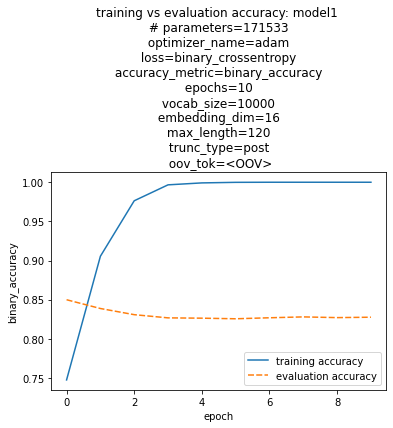

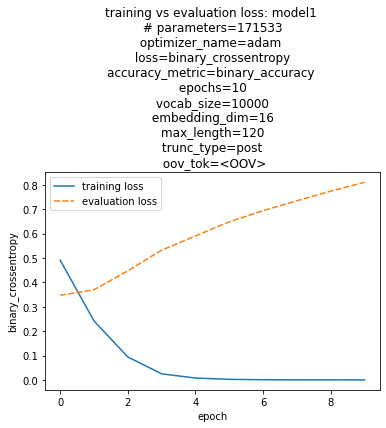

In [32]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [33]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756


In [34]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [35]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [36]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.8246488]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00337203]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.2 model2

## Set Embedding/Modeling Parameters

In [38]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model2'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [39]:
train_data, test_data = imdb['train'], imdb['test']

In [40]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [41]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [42]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [43]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [44]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [45]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [46]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [47]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [48]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [49]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [50]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [51]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [52]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [53]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [54]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [57]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5646 - binary_accuracy: 0.7560 - val_loss: 0.4050 - val_binary_accuracy: 0.8398
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3472 - binary_accuracy: 0.8576 - val_loss: 0.3370 - val_binary_accuracy: 0.8566
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2814 - binary_accuracy: 0.8855 - val_loss: 0.3291 - val_binary_accuracy: 0.8582
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2443 - binary_accuracy: 0.9036 - val_loss: 0.3391 - val_binary_accuracy: 0.8551
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2176 - binary_accuracy: 0.9166 - val_loss: 0.3543 - val_binary_accuracy: 0.8510
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1968 - binary_accuracy: 0.9286 - val_loss: 0.3785 - val_binary_accuracy: 0.8452
Epoch 7/10
782/782 [==============================] - 4s 5ms/ste

## Evaluate Model

In [58]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [59]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 2ms/step - loss: 0.4911 - binary_accuracy: 0.8275


In [60]:
final_eval_loss

0.49107205867767334

In [61]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

160109

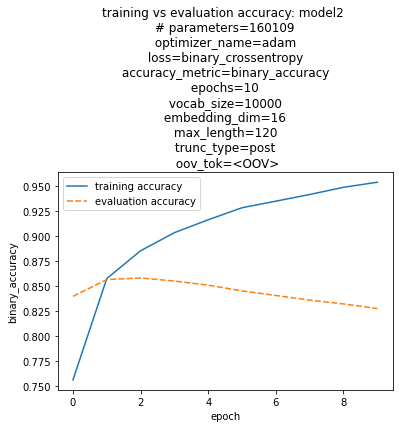

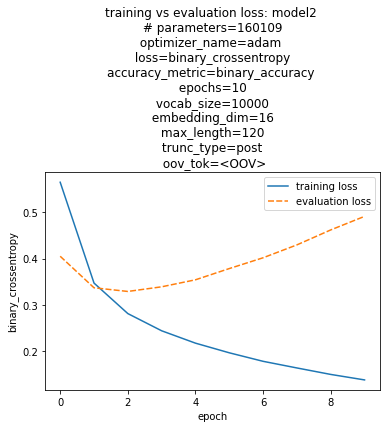

In [62]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [63]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752


In [64]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


In [65]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [66]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.90372336]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.4206474]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.3 model3

## Set Embedding/Modeling Parameters

In [68]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model3'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [69]:
train_data, test_data = imdb['train'], imdb['test']

In [70]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [71]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [72]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [73]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [74]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [75]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [76]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [77]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [78]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [79]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [80]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [81]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [82]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [83]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [89]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         41472     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 246,913
Trainable params: 246,913
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [92]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 32s 35ms/step - loss: 0.6299 - binary_accuracy: 0.6232 - val_loss: 0.4919 - val_binary_accuracy: 0.7889
Epoch 2/10
782/782 [==============================] - 27s 34ms/step - loss: 0.3878 - binary_accuracy: 0.8337 - val_loss: 0.4022 - val_binary_accuracy: 0.8270
Epoch 3/10
782/782 [==============================] - 26s 34ms/step - loss: 0.2856 - binary_accuracy: 0.8878 - val_loss: 0.3651 - val_binary_accuracy: 0.8393
Epoch 4/10
782/782 [==============================] - 27s 35ms/step - loss: 0.2413 - binary_accuracy: 0.9083 - val_loss: 0.3995 - val_binary_accuracy: 0.8344
Epoch 5/10
782/782 [==============================] - 27s 34ms/step - loss: 0.2078 - binary_accuracy: 0.9231 - val_loss: 0.4530 - val_binary_accuracy: 0.8324
Epoch 6/10
782/782 [==============================] - 27s 34ms/step - loss: 0.1774 - binary_accuracy: 0.9393 - val_loss: 0.4285 - val_binary_accuracy: 0.8208
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [93]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [94]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 8s 11ms/step - loss: 0.6452 - binary_accuracy: 0.8133


In [95]:
final_eval_loss

0.6452430486679077

In [96]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

246913

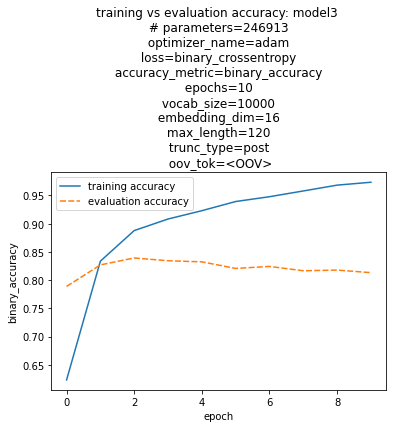

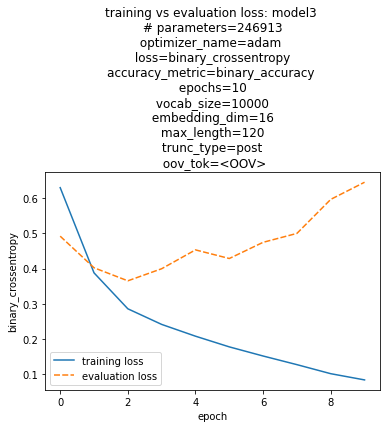

In [97]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [98]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328


In [99]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


In [100]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [101]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.98788583]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.01895473]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.4 model4

## Set Embedding/Modeling Parameters

In [103]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model4'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [104]:
train_data, test_data = imdb['train'], imdb['test']

In [105]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [106]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [107]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [108]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [109]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [110]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [111]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [112]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [113]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [114]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [115]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [116]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [117]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [118]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [119]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [120]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_8 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 165,041
Trainable params: 165,041
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [122]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 17s 18ms/step - loss: 0.4866 - binary_accuracy: 0.7476 - val_loss: 0.3623 - val_binary_accuracy: 0.8451
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2901 - binary_accuracy: 0.8836 - val_loss: 0.3572 - val_binary_accuracy: 0.8461
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2179 - binary_accuracy: 0.9179 - val_loss: 0.4597 - val_binary_accuracy: 0.8129
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1590 - binary_accuracy: 0.9409 - val_loss: 0.5486 - val_binary_accuracy: 0.8147
Epoch 5/10
782/782 [==============================] - 14s 17ms/step - loss: 0.1140 - binary_accuracy: 0.9604 - val_loss: 0.5836 - val_binary_accuracy: 0.8272
Epoch 6/10
782/782 [==============================] - 14s 17ms/step - loss: 0.0802 - binary_accuracy: 0.9730 - val_loss: 0.6103 - val_binary_accuracy: 0.8212
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [123]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [124]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 5s 6ms/step - loss: 0.9112 - binary_accuracy: 0.8061


In [125]:
final_eval_loss

0.9111733436584473

In [126]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

165041

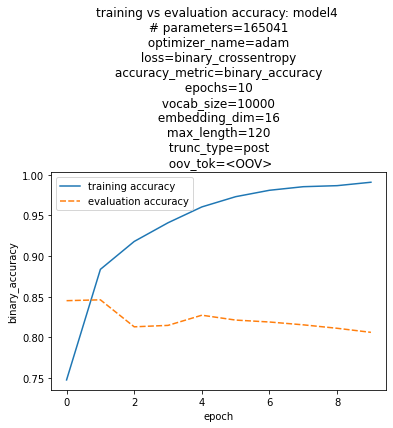

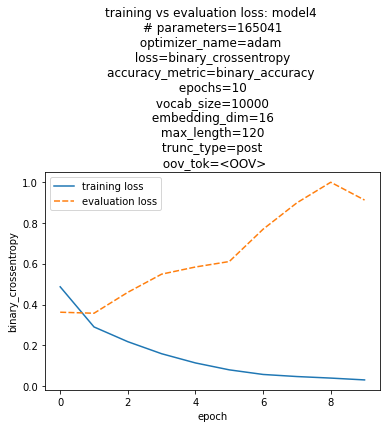

In [127]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [128]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612


In [129]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


In [130]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [131]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.989022]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.14651752]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.5 model5

## Set Embedding/Modeling Parameters

In [133]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model5'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [134]:
train_data, test_data = imdb['train'], imdb['test']

In [135]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [136]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [137]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [138]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [139]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [140]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [141]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [142]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [143]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [144]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [145]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [146]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [147]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [148]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [149]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [150]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [152]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 17s 19ms/step - loss: 0.5606 - binary_accuracy: 0.6893 - val_loss: 0.3833 - val_binary_accuracy: 0.8345
Epoch 2/10
782/782 [==============================] - 14s 17ms/step - loss: 0.3238 - binary_accuracy: 0.8664 - val_loss: 0.3508 - val_binary_accuracy: 0.8475
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2496 - binary_accuracy: 0.9043 - val_loss: 0.4147 - val_binary_accuracy: 0.8400
Epoch 4/10
782/782 [==============================] - 14s 17ms/step - loss: 0.2032 - binary_accuracy: 0.9245 - val_loss: 0.4455 - val_binary_accuracy: 0.8330
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1584 - binary_accuracy: 0.9425 - val_loss: 0.4785 - val_binary_accuracy: 0.8309
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1183 - binary_accuracy: 0.9580 - val_loss: 0.5840 - val_binary_accuracy: 0.8248
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [153]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [154]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 4s 6ms/step - loss: 0.8407 - binary_accuracy: 0.8164


In [155]:
final_eval_loss

0.8406791687011719

In [156]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

172941

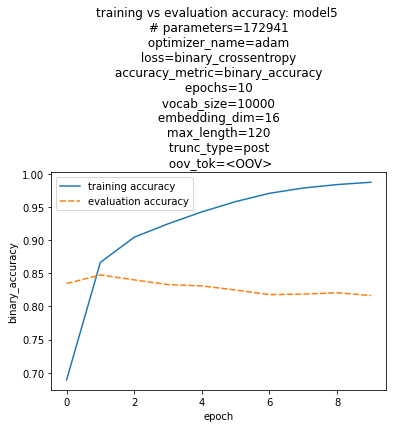

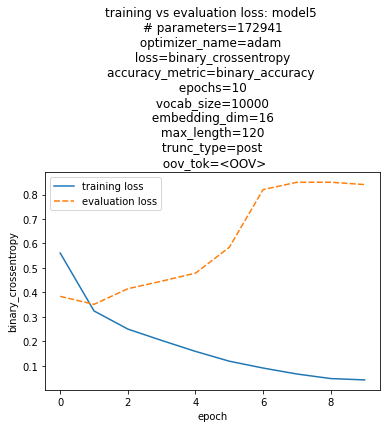

In [157]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [158]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640


In [159]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


In [160]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [161]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.79275775]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.0231835]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.6 model6

## Set Embedding/Modeling Parameters

In [163]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model6'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [164]:
train_data, test_data = imdb['train'], imdb['test']

In [165]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [166]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [167]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [168]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [169]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [170]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [171]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [172]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [173]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [174]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [175]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [176]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [177]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [178]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [179]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [180]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [181]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [182]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 18s 6ms/step - loss: 0.4572 - binary_accuracy: 0.7744 - val_loss: 0.3482 - val_binary_accuracy: 0.8516
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2817 - binary_accuracy: 0.8852 - val_loss: 0.3556 - val_binary_accuracy: 0.8466
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2292 - binary_accuracy: 0.9101 - val_loss: 0.3880 - val_binary_accuracy: 0.8394
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1944 - binary_accuracy: 0.9268 - val_loss: 0.4151 - val_binary_accuracy: 0.8333
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1659 - binary_accuracy: 0.9412 - val_loss: 0.4591 - val_binary_accuracy: 0.8285
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1400 - binary_accuracy: 0.9499 - val_loss: 0.5123 - val_binary_accuracy: 0.8241
Epoch 7/10
782/782 [==============================] - 5s 6ms/st

## Evaluate Model

In [183]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [184]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 2s 2ms/step - loss: 0.8609 - binary_accuracy: 0.8077


In [185]:
final_eval_loss

0.8609001636505127

In [186]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

171149

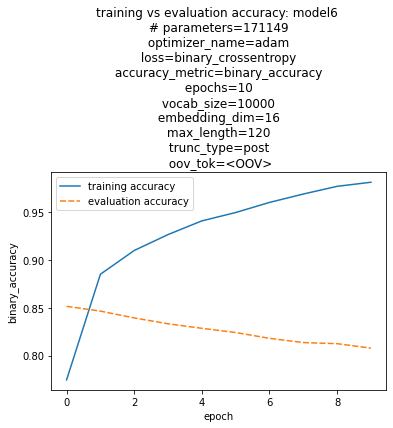

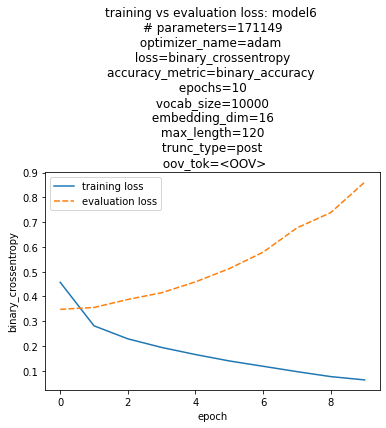

In [187]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [188]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772


In [189]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


In [190]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [191]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.654199]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.28186935]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.7 model7

## Set Embedding/Modeling Parameters

In [193]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model7'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [194]:
train_data, test_data = imdb['train'], imdb['test']

In [195]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [196]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [197]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [198]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [199]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [200]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [201]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [202]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [203]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [204]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [205]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [206]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [207]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [208]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [209]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [210]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [211]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [212]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 17s 18ms/step - loss: 0.4770 - binary_accuracy: 0.7539 - val_loss: 0.3757 - val_binary_accuracy: 0.8303
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 0.2952 - binary_accuracy: 0.8808 - val_loss: 0.3493 - val_binary_accuracy: 0.8448
Epoch 3/10
782/782 [==============================] - 14s 17ms/step - loss: 0.2300 - binary_accuracy: 0.9120 - val_loss: 0.3778 - val_binary_accuracy: 0.8412
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1824 - binary_accuracy: 0.9310 - val_loss: 0.4576 - val_binary_accuracy: 0.8308
Epoch 5/10
782/782 [==============================] - 14s 17ms/step - loss: 0.1338 - binary_accuracy: 0.9531 - val_loss: 0.4964 - val_binary_accuracy: 0.8289
Epoch 6/10
782/782 [==============================] - 14s 17ms/step - loss: 0.0983 - binary_accuracy: 0.9662 - val_loss: 0.5722 - val_binary_accuracy: 0.8278
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [213]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [214]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 5s 6ms/step - loss: 0.9004 - binary_accuracy: 0.8136


In [215]:
final_eval_loss

0.9003946185112

In [216]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

169997

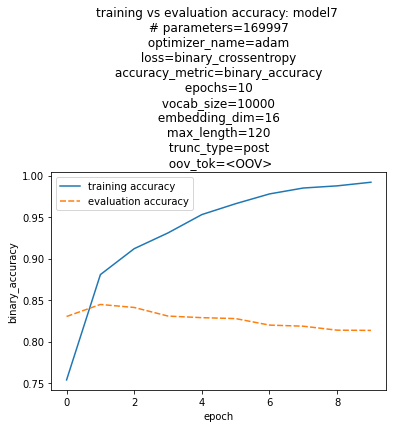

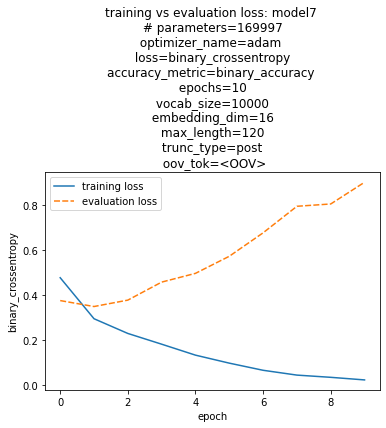

In [217]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [218]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356


In [219]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


In [220]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [221]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [222]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.9907004]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.0010623]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.8 model8

## Set Embedding/Modeling Parameters

In [223]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model8'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 32
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [224]:
train_data, test_data = imdb['train'], imdb['test']

In [225]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [226]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [227]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [228]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [229]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [230]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [231]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [232]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [233]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [234]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [235]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [236]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [237]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [238]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [239]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [240]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 23046     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 343,053
Trainable params: 343,053
Non-trainable params: 0
_________________________________________________________________


In [241]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [242]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4791 - binary_accuracy: 0.7542 - val_loss: 0.3547 - val_binary_accuracy: 0.8439
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1938 - binary_accuracy: 0.9305 - val_loss: 0.3974 - val_binary_accuracy: 0.8300
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0396 - binary_accuracy: 0.9935 - val_loss: 0.4936 - val_binary_accuracy: 0.8237
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0067 - binary_accuracy: 0.9995 - val_loss: 0.5286 - val_binary_accuracy: 0.8306
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 0.5705 - val_binary_accuracy: 0.8320
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 7.7488e-04 - binary_accuracy: 1.0000 - val_loss: 0.6065 - val_binary_accuracy: 0.8330
Epoch 7/10
782/782 [==============================] - 5s 6ms

## Evaluate Model

In [243]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [244]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 2s 2ms/step - loss: 0.7308 - binary_accuracy: 0.8340


In [245]:
final_eval_loss

0.7308313250541687

In [246]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

343053

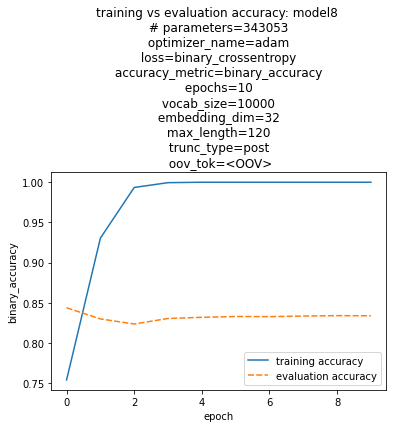

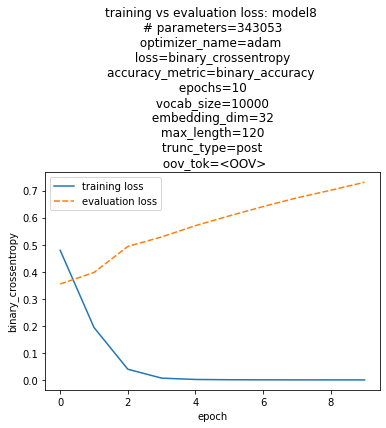

In [247]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [248]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396


In [249]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model8/assets


INFO:tensorflow:Assets written to: model8/assets


In [250]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [251]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [252]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.929615]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00845355]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.9 model9

## Set Embedding/Modeling Parameters

In [253]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model9'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 8
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [254]:
train_data, test_data = imdb['train'], imdb['test']

In [255]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [256]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [257]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [258]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [259]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [260]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [261]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [262]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [263]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [264]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [265]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [266]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [267]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [268]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [269]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [270]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 8)            80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 5766      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 85,773
Trainable params: 85,773
Non-trainable params: 0
_________________________________________________________________


In [271]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [272]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5088 - binary_accuracy: 0.7312 - val_loss: 0.3509 - val_binary_accuracy: 0.8465
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2721 - binary_accuracy: 0.8901 - val_loss: 0.3519 - val_binary_accuracy: 0.8448
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1688 - binary_accuracy: 0.9414 - val_loss: 0.4013 - val_binary_accuracy: 0.8359
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0815 - binary_accuracy: 0.9798 - val_loss: 0.4924 - val_binary_accuracy: 0.8221
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0303 - binary_accuracy: 0.9952 - val_loss: 0.5865 - val_binary_accuracy: 0.8175
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0102 - binary_accuracy: 0.9991 - val_loss: 0.6572 - val_binary_accuracy: 0.8200
Epoch 7/10
782/782 [==============================] - 4s 5ms/ste

## Evaluate Model

In [273]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 8)


In [274]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 1s 2ms/step - loss: 0.8822 - binary_accuracy: 0.8184


In [275]:
final_eval_loss

0.882170557975769

In [276]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

85773

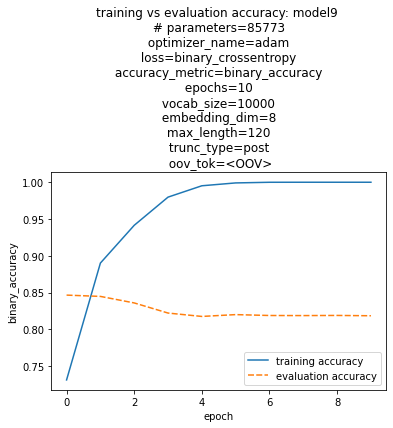

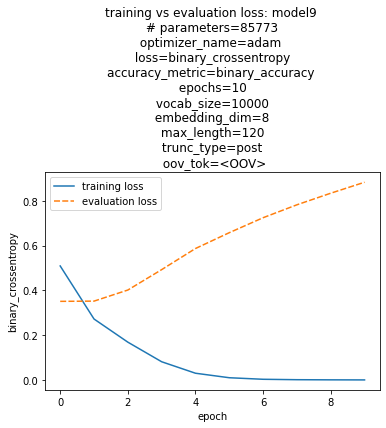

In [277]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [278]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396
8,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model9,"Embedding(vocab_size=10000, \n embedding_dim=8...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.882171,0.81844


In [279]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model9/assets


INFO:tensorflow:Assets written to: model9/assets


In [280]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [281]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [282]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.29823598]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.00028656]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.10 model10

## Set Embedding/Modeling Parameters

In [283]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model10'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 8
max_length = 120
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [284]:
train_data, test_data = imdb['train'], imdb['test']

In [285]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [286]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [287]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [288]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [289]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [290]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [291]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [292]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [293]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [294]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [295]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [296]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [297]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [298]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

## Create Model

In [299]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [300]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 8)            80000     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                8064      
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 88,461
Trainable params: 88,461
Non-trainable params: 0
_________________________________________________________________


In [301]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [302]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 16s 17ms/step - loss: 0.5277 - binary_accuracy: 0.7126 - val_loss: 0.3609 - val_binary_accuracy: 0.8470
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 0.3085 - binary_accuracy: 0.8726 - val_loss: 0.3545 - val_binary_accuracy: 0.8467
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2389 - binary_accuracy: 0.9073 - val_loss: 0.3760 - val_binary_accuracy: 0.8441
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1866 - binary_accuracy: 0.9302 - val_loss: 0.4511 - val_binary_accuracy: 0.8306
Epoch 5/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1508 - binary_accuracy: 0.9460 - val_loss: 0.4929 - val_binary_accuracy: 0.8268
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1184 - binary_accuracy: 0.9584 - val_loss: 0.5536 - val_binary_accuracy: 0.8234
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [303]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 8)


In [304]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 4s 6ms/step - loss: 0.7758 - binary_accuracy: 0.8115


In [305]:
final_eval_loss

0.7758364081382751

In [306]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

88461

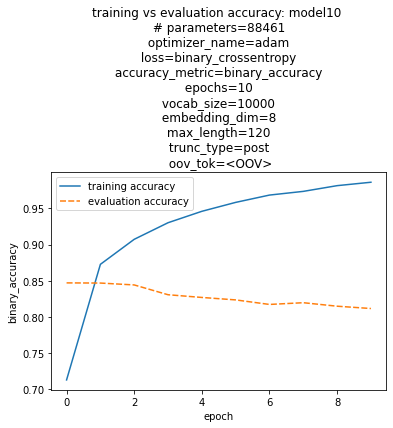

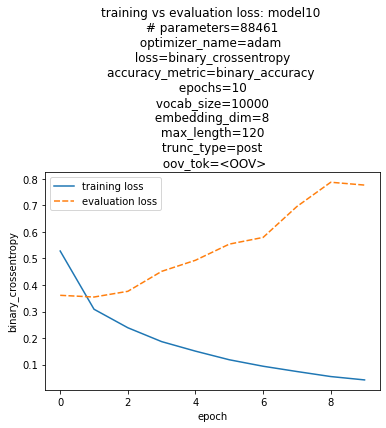

In [307]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [308]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396
8,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model9,"Embedding(vocab_size=10000, \n embedding_dim=8...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.882171,0.81844
9,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model10,"Embedding(vocab_size=10000,embedding_dim=8,inp...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.775836,0.81148


In [309]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model10/assets


INFO:tensorflow:Assets written to: model10/assets


In [310]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [311]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [312]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.99661714]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.15198542]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.11 model11

## Set Embedding/Modeling Parameters

In [313]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model11'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 8
max_length = 500
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [314]:
train_data, test_data = imdb['train'], imdb['test']

In [315]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [316]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [317]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [318]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [319]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [320]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [321]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [322]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [323]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [324]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [325]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [326]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [327]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [328]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous 

## Create Model

In [329]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [330]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 8)            80000     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                8064      
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 88,461
Trainable params: 88,461
Non-trainable params: 0
_________________________________________________________________


In [331]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [332]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 38s 45ms/step - loss: 0.4617 - binary_accuracy: 0.7634 - val_loss: 0.4265 - val_binary_accuracy: 0.8066
Epoch 2/10
782/782 [==============================] - 34s 44ms/step - loss: 0.2564 - binary_accuracy: 0.8986 - val_loss: 0.2970 - val_binary_accuracy: 0.8771
Epoch 3/10
782/782 [==============================] - 35s 44ms/step - loss: 0.1949 - binary_accuracy: 0.9282 - val_loss: 0.3463 - val_binary_accuracy: 0.8571
Epoch 4/10
782/782 [==============================] - 35s 45ms/step - loss: 0.1657 - binary_accuracy: 0.9406 - val_loss: 0.3310 - val_binary_accuracy: 0.8739
Epoch 5/10
782/782 [==============================] - 35s 45ms/step - loss: 0.1332 - binary_accuracy: 0.9544 - val_loss: 0.3638 - val_binary_accuracy: 0.8684
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.1177 - binary_accuracy: 0.9599 - val_loss: 0.4233 - val_binary_accuracy: 0.8632
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [333]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 8)


In [334]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 12s 15ms/step - loss: 0.5585 - binary_accuracy: 0.8562


In [335]:
final_eval_loss

0.5584661960601807

In [336]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

88461

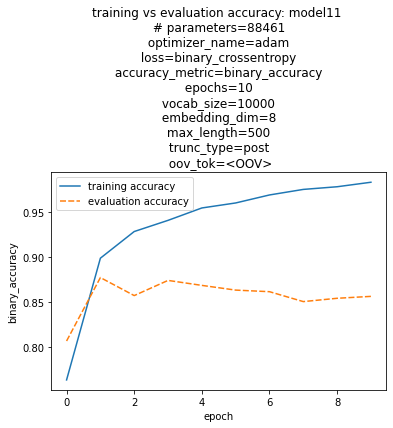

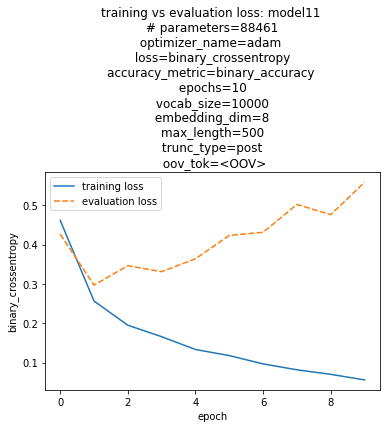

In [337]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [338]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396
8,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model9,"Embedding(vocab_size=10000, \n embedding_dim=8...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.882171,0.81844
9,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model10,"Embedding(vocab_size=10000,embedding_dim=8,inp...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.775836,0.81148


In [339]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model11/assets


INFO:tensorflow:Assets written to: model11/assets


In [340]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [341]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [342]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.7426274]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.03071028]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.12 model12

## Set Embedding/Modeling Parameters

In [343]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model12'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 20000
embedding_dim = 8
max_length = 500
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [344]:
train_data, test_data = imdb['train'], imdb['test']

In [345]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [346]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [347]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [348]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [349]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [350]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [351]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [352]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [353]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [354]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [355]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [356]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [357]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [358]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b this was an absolutely terrible movie don't be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculo

## Create Model

In [359]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [360]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 8)            160000    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                8064      
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 168,461
Trainable params: 168,461
Non-trainable params: 0
_________________________________________________________________


In [361]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [362]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 38s 45ms/step - loss: 0.4772 - binary_accuracy: 0.7586 - val_loss: 0.3409 - val_binary_accuracy: 0.8587
Epoch 2/10
782/782 [==============================] - 35s 45ms/step - loss: 0.2505 - binary_accuracy: 0.9034 - val_loss: 0.3070 - val_binary_accuracy: 0.8749
Epoch 3/10
782/782 [==============================] - 35s 45ms/step - loss: 0.1710 - binary_accuracy: 0.9392 - val_loss: 0.3464 - val_binary_accuracy: 0.8608
Epoch 4/10
782/782 [==============================] - 35s 45ms/step - loss: 0.1315 - binary_accuracy: 0.9550 - val_loss: 0.3540 - val_binary_accuracy: 0.8664
Epoch 5/10
782/782 [==============================] - 36s 46ms/step - loss: 0.0943 - binary_accuracy: 0.9698 - val_loss: 0.4019 - val_binary_accuracy: 0.8605
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.0738 - binary_accuracy: 0.9763 - val_loss: 0.4657 - val_binary_accuracy: 0.8550
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [363]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(20000, 8)


In [364]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 12s 15ms/step - loss: 0.6428 - binary_accuracy: 0.8327


In [365]:
final_eval_loss

0.6428314447402954

In [366]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

168461

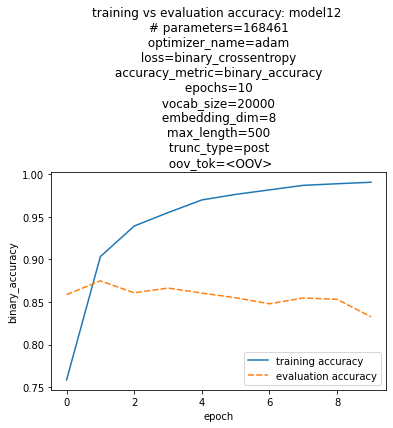

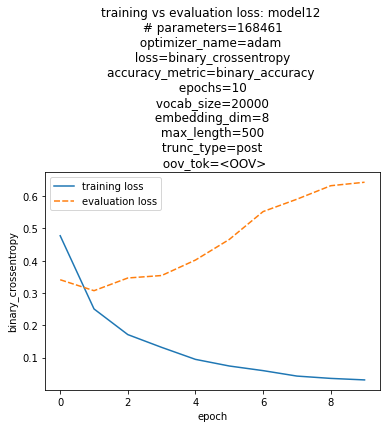

In [367]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [368]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396
8,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model9,"Embedding(vocab_size=10000, \n embedding_dim=8...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.882171,0.81844
9,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model10,"Embedding(vocab_size=10000,embedding_dim=8,inp...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.775836,0.81148


In [369]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model12/assets


INFO:tensorflow:Assets written to: model12/assets


In [370]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [371]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [372]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.9974946]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.01302545]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.13 model13

## Set Embedding/Modeling Parameters

In [373]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model13'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 8
max_length = 5000
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [374]:
train_data, test_data = imdb['train'], imdb['test']

In [375]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [376]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [377]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [378]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [379]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [380]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [381]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [382]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [383]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [384]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [385]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [386]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [387]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [388]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

## Create Model

In [389]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [390]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 5000, 8)           80000     
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                8064      
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 88,461
Trainable params: 88,461
Non-trainable params: 0
_________________________________________________________________


In [391]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [392]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 294s 372ms/step - loss: 0.6901 - binary_accuracy: 0.5186 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/10
782/782 [==============================] - 293s 375ms/step - loss: 0.6932 - binary_accuracy: 0.4986 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 293s 375ms/step - loss: 0.6932 - binary_accuracy: 0.5010 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 4/10
782/782 [==============================] - 293s 374ms/step - loss: 0.6932 - binary_accuracy: 0.4962 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/10
782/782 [==============================] - 294s 376ms/step - loss: 0.6932 - binary_accuracy: 0.4969 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/10
782/782 [==============================] - 291s 372ms/step - loss: 0.6932 - binary_accuracy: 0.5013 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 7/10
782/782 [====================

## Evaluate Model

In [393]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 8)


In [394]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 96s 123ms/step - loss: 0.6931 - binary_accuracy: 0.5000


In [395]:
final_eval_loss

0.6931466460227966

In [396]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

88461

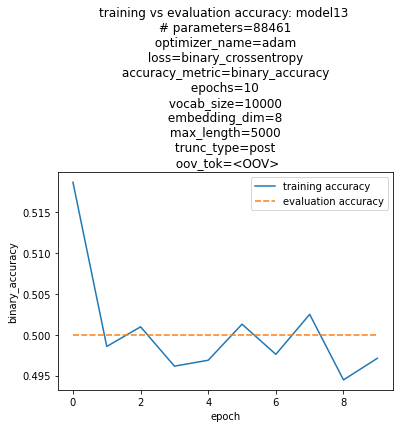

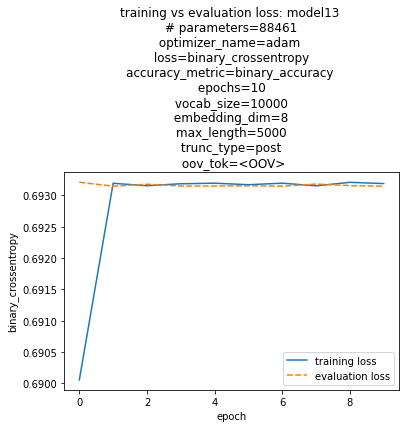

In [397]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [398]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396
8,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model9,"Embedding(vocab_size=10000, \n embedding_dim=8...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.882171,0.81844
9,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model10,"Embedding(vocab_size=10000,embedding_dim=8,inp...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.775836,0.81148


In [399]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model13/assets


INFO:tensorflow:Assets written to: model13/assets


In [400]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [401]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [402]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.50029075]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.50029075]]
This makes sense since it is a value close to 0, meaning a bad review


# 4.14 model14

## Set Embedding/Modeling Parameters

In [403]:
filename='TF_CNN_Sequential_NLP_imdb_reviews.ipynb'
model_name='model14'
optimizer='adam'
optimizer_name=str(optimizer)
loss='binary_crossentropy'
accuracy_metric='binary_accuracy'
epochs=10

vocab_size = 10000
embedding_dim = 100
max_length = 500
trunc_type='post'
oov_tok = '<OOV>'

## Split Train/Test

In [404]:
train_data, test_data = imdb['train'], imdb['test']

In [405]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [406]:
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

In [407]:
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [408]:
import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create Tokenizer

In [409]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #create tokenizer that has a vocab_size & oov_token specified above

In [410]:
testing_labels_final.max() #ensure max is still 1 for a "bad" review

1

In [411]:
tokenizer.fit_on_texts(training_sentences) #fit the tokenizer on the training_sentences 

In [412]:
word_index = tokenizer.word_index #get the word index for the tokenizer

In [413]:
sequences = tokenizer.texts_to_sequences(training_sentences) #convert texts to sequences using the tokenizer

In [414]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type) # pad the sequences by the max_length with truncation set to trunc_type

In [415]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # convert the testing_sentences to testing_sequences

In [416]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length) # convert the testing_sequences to testing_padded

In [417]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse the key,value from word_index to check index value to key

In [418]:
print(decode_review(padded[0])) #This is after it has been padded and OOV in place, but decoded.  Recall this is actually padded as a sequence of numbers for training
print(training_sentences[0]) #This is the original

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous 

## Create Model

In [419]:
model,model_description=model_picker(vocab_size=vocab_size,embedding_dim=embedding_dim,input_length=max_length,model_name=model_name)

In [420]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 64)                34048     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 1,038,273
Trainable params: 1,038,273
Non-trainable params: 0
_________________________________________________________________


In [421]:
model.compile(loss=loss,optimizer=optimizer,metrics=[accuracy_metric])

## Train Model

In [422]:
history=model.fit(padded, training_labels_final,epochs=epochs,validation_data=(testing_padded,
                                                                           testing_labels_final))

Epoch 1/10
782/782 [==============================] - 47s 56ms/step - loss: 0.4113 - binary_accuracy: 0.8123 - val_loss: 0.3216 - val_binary_accuracy: 0.8679
Epoch 2/10
782/782 [==============================] - 44s 56ms/step - loss: 0.2561 - binary_accuracy: 0.9012 - val_loss: 0.3240 - val_binary_accuracy: 0.8622
Epoch 3/10
782/782 [==============================] - 44s 56ms/step - loss: 0.1921 - binary_accuracy: 0.9282 - val_loss: 0.3550 - val_binary_accuracy: 0.8585
Epoch 4/10
782/782 [==============================] - 44s 56ms/step - loss: 0.1335 - binary_accuracy: 0.9516 - val_loss: 0.3637 - val_binary_accuracy: 0.8600
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 0.1162 - binary_accuracy: 0.9591 - val_loss: 0.4087 - val_binary_accuracy: 0.8679
Epoch 6/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0929 - binary_accuracy: 0.9684 - val_loss: 0.4493 - val_binary_accuracy: 0.8587
Epoch 7/10
782/782 [==============================] 

## Evaluate Model

In [423]:
e = model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 100)


In [424]:
final_eval_loss,final_eval_acc=model.evaluate(testing_padded,testing_labels_final)

782/782 [==============================] - 13s 16ms/step - loss: 0.7027 - binary_accuracy: 0.8620


In [425]:
final_eval_loss

0.7027295231819153

In [426]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
trainableParams

1038273

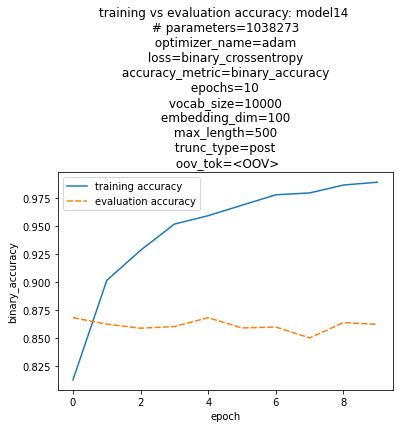

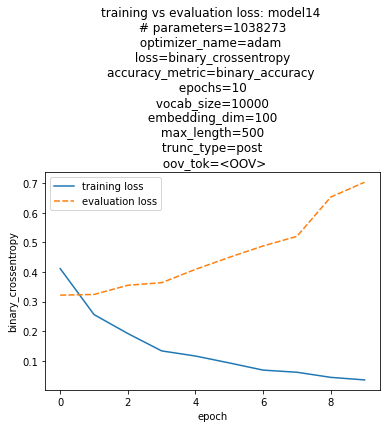

In [427]:
plot_train_eval(history,model_name,trainableParams,optimizer_name,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok)

In [428]:
df=pd.DataFrame([[filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc]],columns=cols)
df_metrics=df_metrics.append(df,ignore_index=True)
df_metrics

,filename,model_name,model_description,optimizer,loss,accuracy_metric,epochs,vocab_size,embedding_dim,max_length,trunc_type,oov_tok,final_eval_loss,final_eval_acc
0,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model1,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.810344,0.82756
1,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model2,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.491072,0.82752
2,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model3,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.645243,0.81328
3,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model4,"Embedding(vocab_size=10000, \n embedding_dim=1...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.911173,0.80612
4,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model5,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.840679,0.81640
5,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model6,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.860900,0.80772
6,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model7,"Embedding(vocab_size=10000,embedding_dim=16,in...",adam,binary_crossentropy,binary_accuracy,10,10000,16,120,post,<OOV>,0.900395,0.81356
7,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model8,"Embedding(vocab_size=10000, \n embedding_dim=3...",adam,binary_crossentropy,binary_accuracy,10,10000,32,120,post,<OOV>,0.730831,0.83396
8,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model9,"Embedding(vocab_size=10000, \n embedding_dim=8...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.882171,0.81844
9,TF_CNN_Sequential_NLP_imdb_reviews.ipynb,model10,"Embedding(vocab_size=10000,embedding_dim=8,inp...",adam,binary_crossentropy,binary_accuracy,10,10000,8,120,post,<OOV>,0.775836,0.81148


In [429]:
model.save(model_name) #save model
model=tf.keras.models.load_model(model_name) #load model
df_metrics.to_excel('df_metrics.xlsx')

INFO:tensorflow:Assets written to: model14/assets


INFO:tensorflow:Assets written to: model14/assets


In [430]:
import io

out_v = io.open(f'vecs_{model_name}.tsv', 'w', encoding='utf-8')
out_m = io.open(f'meta_{model_name}.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [431]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(f'vecs_{model_name}.tsv')
  files.download(f'meta_{model_name}.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [432]:
# Testing new Custom Reviews
sentence1='What a great movie.'
test1=tokenizer.texts_to_sequences([sentence1])
test1= pad_sequences(test1, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test1)
print(f'Review for this sentence: \n {sentence1} \n is a value of {answer}')
print('This makes sense since it is a value close to 1, meaning a good review')
print('\n')

sentence2='What a terrible movie.'
test2=tokenizer.texts_to_sequences([sentence2])
test2= pad_sequences(test2, maxlen=max_length, truncating=trunc_type)
answer=model.predict(test2)
print(f'Review for this sentence: \n {sentence2} \n is a value of {answer}')
print('This makes sense since it is a value close to 0, meaning a bad review')

Review for this sentence: 
 What a great movie. 
 is a value of [[0.8278699]]
This makes sense since it is a value close to 1, meaning a good review


Review for this sentence: 
 What a terrible movie. 
 is a value of [[0.0159516]]
This makes sense since it is a value close to 0, meaning a bad review


# 5.0 Export Models

In [433]:
!zip -r /content/model1.zip /content/model1

  adding: content/model1/ (stored 0%)
  adding: content/model1/assets/ (stored 0%)
  adding: content/model1/variables/ (stored 0%)
  adding: content/model1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model1/variables/variables.index (deflated 61%)
  adding: content/model1/saved_model.pb (deflated 87%)
  adding: content/model1/keras_metadata.pb (deflated 85%)


In [434]:
!zip -r /content/model2.zip /content/model2

  adding: content/model2/ (stored 0%)
  adding: content/model2/assets/ (stored 0%)
  adding: content/model2/variables/ (stored 0%)
  adding: content/model2/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model2/variables/variables.index (deflated 61%)
  adding: content/model2/saved_model.pb (deflated 87%)
  adding: content/model2/keras_metadata.pb (deflated 85%)


In [435]:
!zip -r /content/model3.zip /content/model3

  adding: content/model3/ (stored 0%)
  adding: content/model3/assets/ (stored 0%)
  adding: content/model3/variables/ (stored 0%)
  adding: content/model3/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model3/variables/variables.index (deflated 69%)
  adding: content/model3/saved_model.pb (deflated 90%)
  adding: content/model3/keras_metadata.pb (deflated 92%)


In [436]:
!zip -r /content/model4.zip /content/model4

  adding: content/model4/ (stored 0%)
  adding: content/model4/assets/ (stored 0%)
  adding: content/model4/variables/ (stored 0%)
  adding: content/model4/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model4/variables/variables.index (deflated 67%)
  adding: content/model4/saved_model.pb (deflated 90%)
  adding: content/model4/keras_metadata.pb (deflated 90%)


In [437]:
!zip -r /content/model5.zip /content/model5

  adding: content/model5/ (stored 0%)
  adding: content/model5/assets/ (stored 0%)
  adding: content/model5/variables/ (stored 0%)
  adding: content/model5/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model5/variables/variables.index (deflated 66%)
  adding: content/model5/saved_model.pb (deflated 90%)
  adding: content/model5/keras_metadata.pb (deflated 90%)


In [438]:
!zip -r /content/model6.zip /content/model6

  adding: content/model6/ (stored 0%)
  adding: content/model6/assets/ (stored 0%)
  adding: content/model6/variables/ (stored 0%)
  adding: content/model6/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model6/variables/variables.index (deflated 62%)
  adding: content/model6/saved_model.pb (deflated 87%)
  adding: content/model6/keras_metadata.pb (deflated 88%)


In [439]:
!zip -r /content/model7.zip /content/model7

  adding: content/model7/ (stored 0%)
  adding: content/model7/assets/ (stored 0%)
  adding: content/model7/variables/ (stored 0%)
  adding: content/model7/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model7/variables/variables.index (deflated 67%)
  adding: content/model7/saved_model.pb (deflated 90%)
  adding: content/model7/keras_metadata.pb (deflated 90%)


In [440]:
!zip -r /content/model8.zip /content/model8

  adding: content/model8/ (stored 0%)
  adding: content/model8/assets/ (stored 0%)
  adding: content/model8/variables/ (stored 0%)
  adding: content/model8/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model8/variables/variables.index (deflated 60%)
  adding: content/model8/saved_model.pb (deflated 87%)
  adding: content/model8/keras_metadata.pb (deflated 85%)


In [441]:
!zip -r /content/model9.zip /content/model9

  adding: content/model9/ (stored 0%)
  adding: content/model9/assets/ (stored 0%)
  adding: content/model9/variables/ (stored 0%)
  adding: content/model9/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model9/variables/variables.index (deflated 61%)
  adding: content/model9/saved_model.pb (deflated 87%)
  adding: content/model9/keras_metadata.pb (deflated 86%)


In [442]:
!zip -r /content/model10.zip /content/model10

  adding: content/model10/ (stored 0%)
  adding: content/model10/assets/ (stored 0%)
  adding: content/model10/variables/ (stored 0%)
  adding: content/model10/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model10/variables/variables.index (deflated 67%)
  adding: content/model10/saved_model.pb (deflated 91%)
  adding: content/model10/keras_metadata.pb (deflated 90%)


In [443]:
!zip -r /content/model11.zip /content/model11

  adding: content/model11/ (stored 0%)
  adding: content/model11/assets/ (stored 0%)
  adding: content/model11/variables/ (stored 0%)
  adding: content/model11/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model11/variables/variables.index (deflated 67%)
  adding: content/model11/saved_model.pb (deflated 91%)
  adding: content/model11/keras_metadata.pb (deflated 90%)


In [444]:
!zip -r /content/model12.zip /content/model12

  adding: content/model12/ (stored 0%)
  adding: content/model12/assets/ (stored 0%)
  adding: content/model12/variables/ (stored 0%)
  adding: content/model12/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model12/variables/variables.index (deflated 67%)
  adding: content/model12/saved_model.pb (deflated 90%)
  adding: content/model12/keras_metadata.pb (deflated 90%)


In [445]:
!zip -r /content/model13.zip /content/model13

  adding: content/model13/ (stored 0%)
  adding: content/model13/assets/ (stored 0%)
  adding: content/model13/variables/ (stored 0%)
  adding: content/model13/variables/variables.data-00000-of-00001 (deflated 38%)
  adding: content/model13/variables/variables.index (deflated 68%)
  adding: content/model13/saved_model.pb (deflated 91%)
  adding: content/model13/keras_metadata.pb (deflated 90%)


In [446]:
!zip -r /content/model14.zip /content/model14

  adding: content/model14/ (stored 0%)
  adding: content/model14/assets/ (stored 0%)
  adding: content/model14/variables/ (stored 0%)
  adding: content/model14/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model14/variables/variables.index (deflated 66%)
  adding: content/model14/saved_model.pb (deflated 90%)
  adding: content/model14/keras_metadata.pb (deflated 90%)


# Install **rclone**
This is so you can save your checkpoints weights to your actual google drive for restoration.

In [447]:
! curl https://rclone.org/install.sh | sudo bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4491  100  4491    0     0  59880      0 --:--:-- --:--:-- --:--:-- 59880
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0    211      0 --:--:-- --:--:-- --:--:--   208
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.8M  100 13.8M    0     0  60.8M      0 --:--:-- --:--:-- --:--:-- 60.8M
Archive:  rclone-current-linux-amd64.zip
   creating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/
  inflating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/README.txt  [text]  
  inflating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/rclone.1  [text]  
  inflating:

You want to create a remote configuration with rclone.  Use the default recommendations.

In [448]:
!rclone config

2021/06/07 02:13:29 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found - make a new one
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n
name> remote
Type of storage to configure.
Enter a string value. Press Enter for the default ("").
Choose a number from below, or type in your own value
 1 / 1Fichier
   \ "fichier"
 2 / Alias for an existing remote
   \ "alias"
 3 / Amazon Drive
   \ "amazon cloud drive"
 4 / Amazon S3 Compliant Storage Providers including AWS, Alibaba, Ceph, Digital Ocean, Dreamhost, IBM COS, Minio, and Tencent COS
   \ "s3"
 5 / Backblaze B2
   \ "b2"
 6 / Box
   \ "box"
 7 / Cache a remote
   \ "cache"
 8 / Citrix Sharefile
   \ "sharefile"
 9 / Compress a remote
   \ "compress"
10 / Dropbox
   \ "dropbox"
11 / Encrypt/Decrypt a remote
   \ "crypt"
12 / Enterprise File Fabric
   \ "filefabric"
13 / FTP Connection
   \ "ftp"
14 / Google Cloud Storage (this is not Google Drive)
   \ "google cloud sto

# Copy Content to **Google Drive** with **rclone**
Try to copy exisiting weights to a future directory to ensure rclone is configured right

This line tests the ability to copy known weights to a directory on you **Google Drive** with **rclone**

In [449]:
!rclone copy "/content/"  remote:"/Colab_Notebooks/GitHub/TensorFlow_Examples/Basics/Wk6/content"